# Makemore

In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

## Bigram Character Model

In [6]:
b = {}
for w in words:
    chs = ["<S>"] + list(w) + ["<S>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        # print(ch1, ch2)

Now `b` has the following structure:

```python
{
    ('<S>', 'e') : 1531,
    ('e', 'm') : 769,
    ('m', 'm') : 168,
#   ...
}
```

### Sorting Based on The Most Frequent Bigrams

In [7]:
sorted(b.items(), key = lambda kv: -kv[1]) 
# sorting based on value (not the key) & doing it in decreasing order

[(('n', '<S>'), 6763),
 (('a', '<S>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<S>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<S>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<S>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<S>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [8]:
import torch

In [9]:
# creating a tensor of zeros
torch.zeros((3,5), dtype=torch.int32)

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

We need to make a 2D array where each row would be the first character and then the column will be the next character.
Therefore we need the size of the 2D array to be 28 (26 characters + `<S>` + `<E>`)

In [10]:
N = torch.zeros((28, 28), dtype=torch.int32)

Now we need to map the letter to the indexes in the 2D tensor:

In [11]:
# getting all the letters from the words (by converting it into a set to remove duplicates)
# then we convert it back to a list
# then we sort it in alphabetical order

chars = sorted(list(set(''.join(words))))
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [12]:
len(chars)

26

In [13]:
#  s to i : mapping from character to integer
stoi = {s: i for i, s in enumerate(chars)}

In [14]:
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

Now we need to also set start `<S>` and end `<E>` characters in `stoi`

In [15]:
stoi['<S>'] = 26
stoi['<E>'] = 27

In [ ]:
for w in words:
    chs = ["<S>"] + list(w) + ["<S>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        # now for both the characters get the index
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        # now increment the 2D tensor N
        N[ix1, ix2] += 1

### Visualize the 2D Bigram Array `N`

#### HeatMap

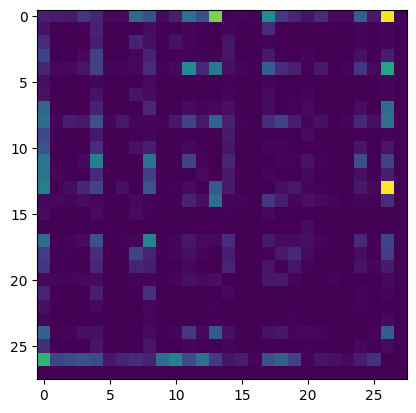

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

#### Heatmap With First & Last Letters & Counts

In [18]:
# let's reverse the dictionary stoi --> itos
itos = {i: s for s,i in stoi.items()}

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

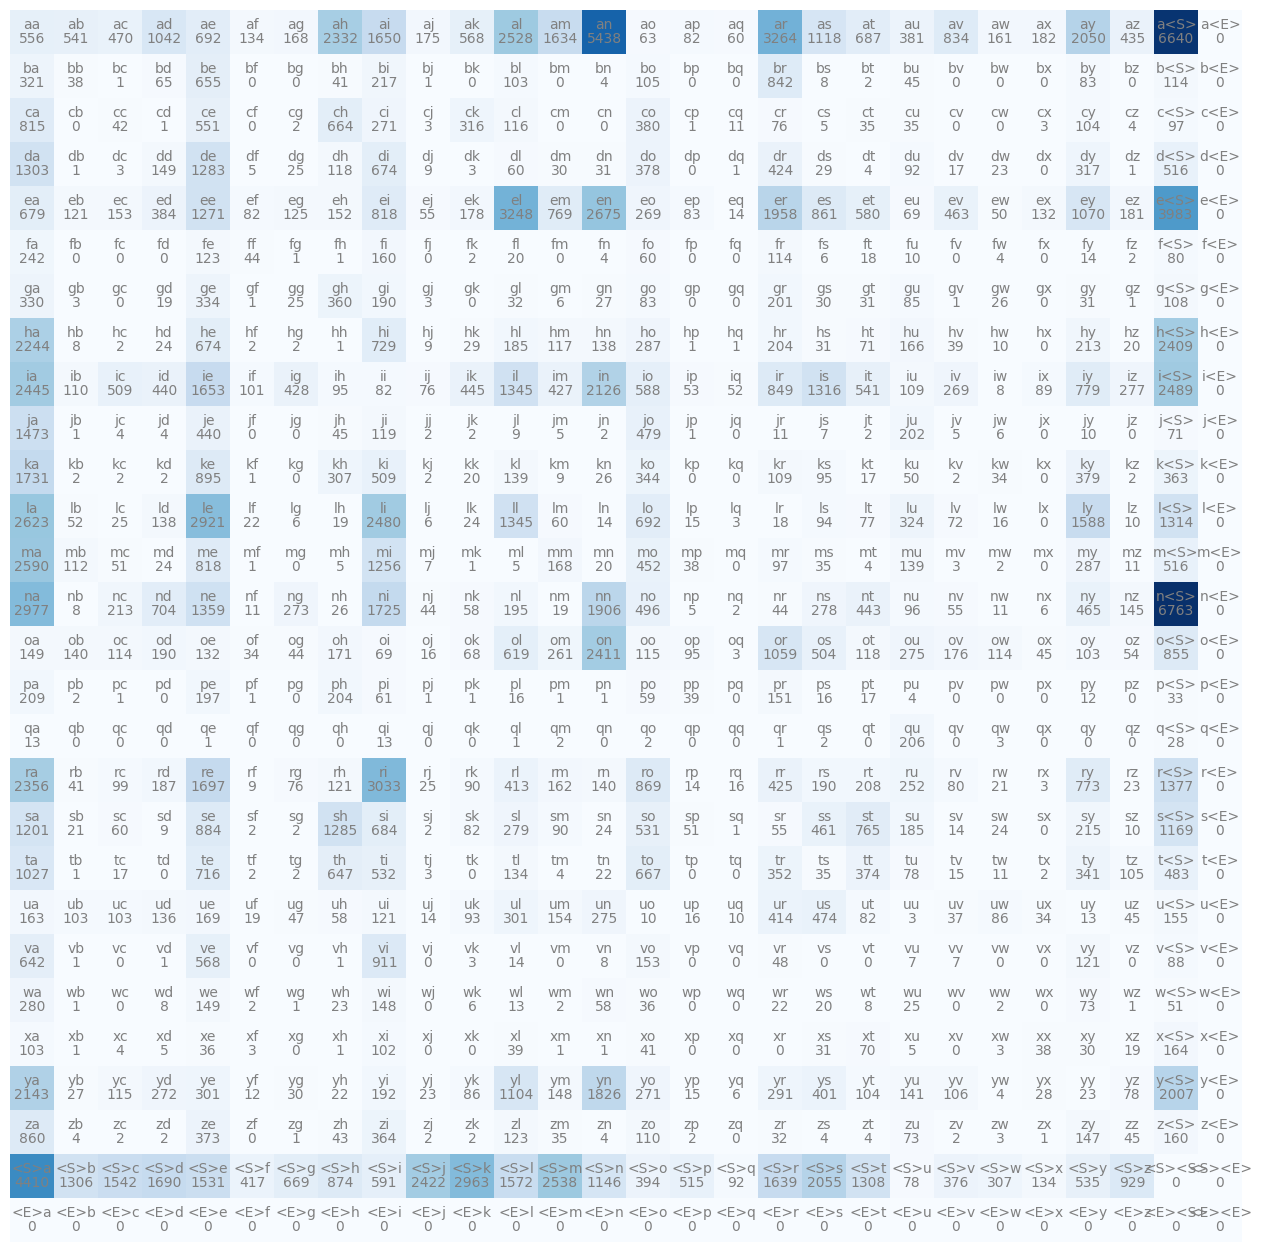

In [19]:
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')

In the above there are rows and columns which are never going to have any number other than 0:
- the last row is when the ending character, `<E>` comes before another character
- the second last column when the starting character `<S>` comes after another character
- the one node of the starting character and the ending character together `<S><E>` (no other characters)
- the `<S>` and `<E>` is very verbose so we can change that

## Redesigning 2D Bi-gram Array

In [20]:
N = torch.zeros((27,27), dtype=torch.int32)

In [23]:
chars = sorted(list(set(''.join(words))))
#  s to i : mapping from character to integer
stoi = {s: i+1 for i, s in enumerate(chars)}
# new character for both <S> and <E>
stoi['.'] = 0
# let's reverse the dictionary stoi --> itos
itos = {i: s for s,i in stoi.items()}

In [26]:
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        # now for both the characters get the index
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        # now increment the 2D tensor N
        N[ix1, ix2] += 1

### New Bi-gram Heatmap

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

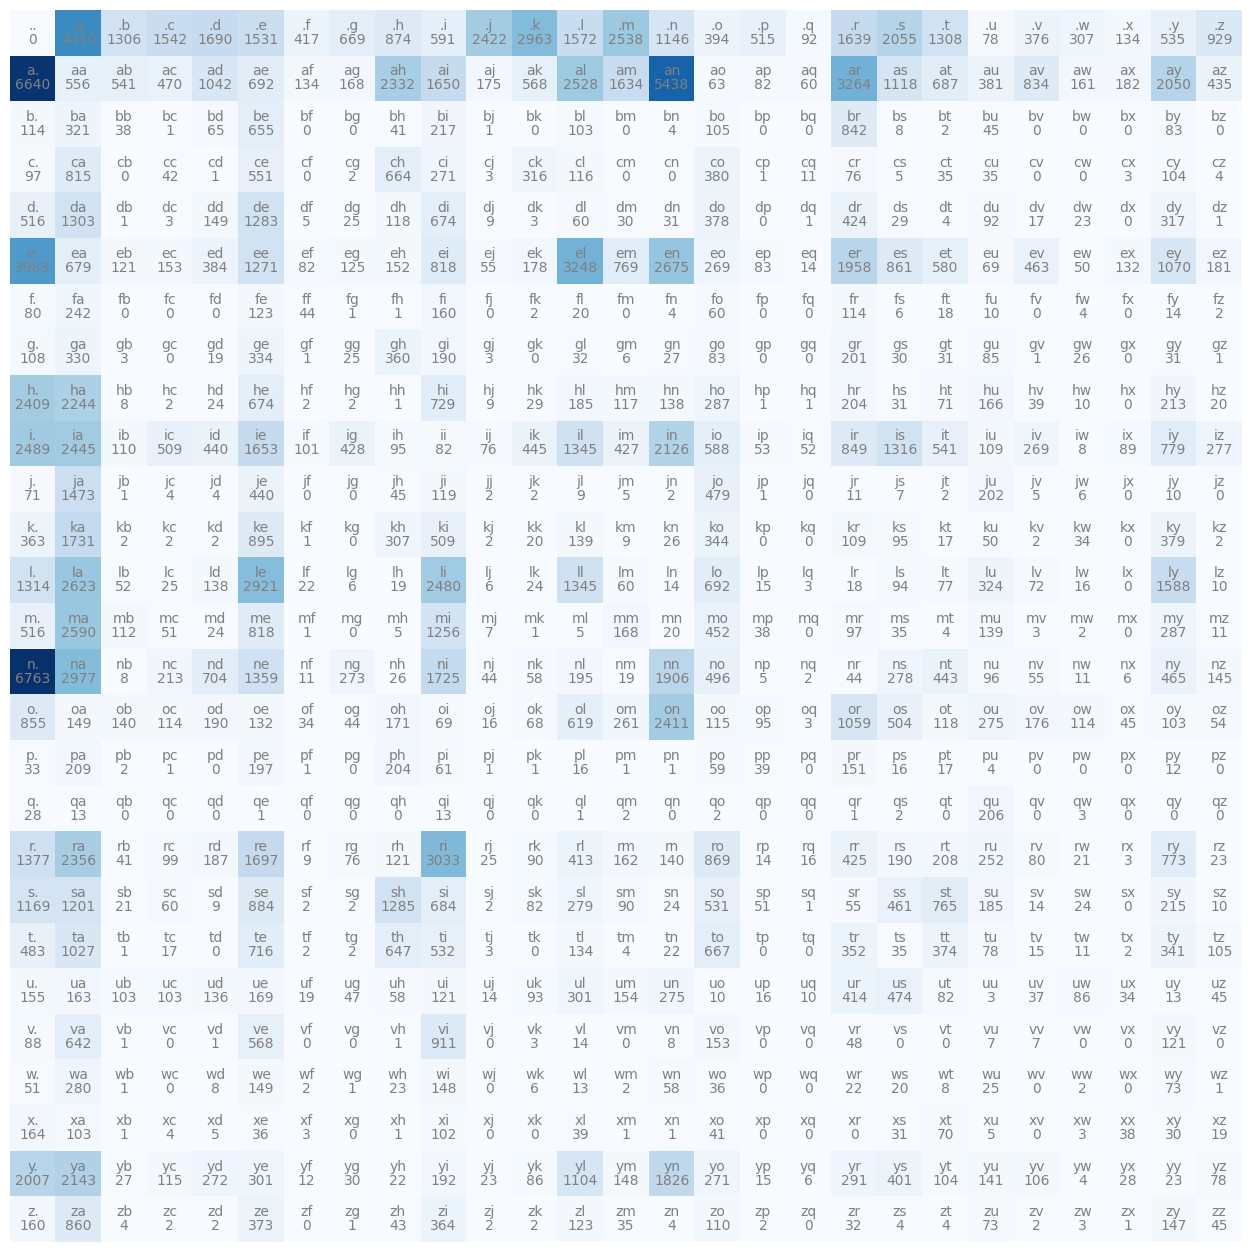

In [27]:
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')

In [29]:
# first row
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [30]:
# probability vector - p
p = N[0].float()
p = p / p.sum()

In [32]:
# this  is the probability of any single character to be the starting of the word (since we did p for N[0])
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [33]:
# total probability = 1
p.sum()

tensor(1.)